In [1]:
from transient_piezo_truss import * 
import matplotlib.pyplot as plt 
import numpy as np
%load_ext autoreload
%autoreload 2

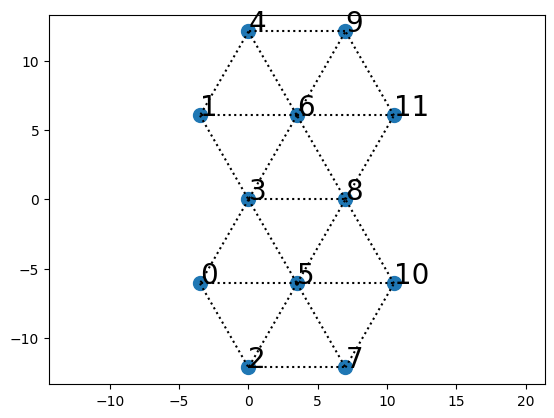

=== Q_Error:2.1738e-03 ===: 100%|██████████| 30/30 [00:57<00:00,  1.92s/it]


In [2]:
# Create a static_piezo_truss object
freq = [5, 10, 15, 3, 17, 29]
transient_piezo_truss = TransientPiezoTruss(freq=freq, load=True, path='Pol.npz')
# Plot the structure
transient_piezo_truss.plotStructure()
#
UNodes_free = [0, 1, 2]
u_free = np.zeros((3, len(freq), 2))
#
# UNodes_clamped = [20, 21, 22, 23]
# u_clamped = [[[1E-6, 2E-6]], [[5E-6, -4E-6]], [[3E-6, -3E-6]], [[-2E-6, 5E-6]]]
UNodes_clamped = [0, 1, 2, 20, 21, 22, 23]
u_clamped = [  [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],
                [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],
                [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],
                [[1E-6, 2E-6], [5E-6, -4E-6], [3E-6, -3E-6], [-2E-6, 5E-6], [1E-6, 2E-6], [5E-6, -4E-6]],
                [[1E-6, 2E-6], [3E-6, -2E-6], [-1E-6, -6E-6], [-2E-6, 3E-6], [7E-6, -7E-6], [5E-6, -4E-6]],
                [[3E-6, 2E-6], [6E-6, -2E-6], [-1E-6, -3E-6], [-2E-6, 1E-6], [3E-6, -7E-6], [3E-6, -2E-6]],
                [[1E-6, 2E-6], [3E-6, -1E-6], [-1E-6, -6E-6], [-2E-6, 3E-6], [2E-6, -7E-6], [5E-6, -4E-6]] ]
#
T = np.linspace(0, 1, 1000)
N = len(T) // 2
Vol = np.ones((len(transient_piezo_truss.edges), len(freq), 2)) * 10
Vol[:, :, 1] = 0
#
Epoch = 30
lr = 2E9
err = 10.
# Vol = np.ones((len(transient_piezo_truss.edges), len(freq), 2)) * 10
pbar = tqdm.tqdm(range(Epoch))
for i in pbar:
    #
    pbar.set_description("=== Q_Error:{:.4e} ===".format(err))
    #
    transient_piezo_truss.solve(T, UNodes_free, u_free, V=Vol)
    Q_free = transient_piezo_truss.calQ.copy()
    #
    transient_piezo_truss.solve(T, UNodes_clamped, u_clamped, V=Vol)
    Q_clamped = transient_piezo_truss.calQ.copy()
    #
    for n, fq in enumerate(freq):
        Q_free_sin = 2 * Q_free[:, N:] @ np.sin(fq * 2 * np.pi * T[N:]) / len(T[N:])
        Q_free_cos = 2 * Q_free[:, N:] @ np.cos(fq * 2 * np.pi * T[N:]) / len(T[N:])
        #
        Q_clamped_sin = 2 * Q_clamped[:, N:] @ np.sin(fq * 2 * np.pi * T[N:]) / len(T[N:])
        Q_clamped_cos = 2 * Q_clamped[:, N:] @ np.cos(fq * 2 * np.pi * T[N:]) / len(T[N:])
        #
        Vol[:, n, 0] -= lr * (Q_clamped_sin - Q_free_sin)
        Vol[:, n, 1] -= lr * (Q_clamped_cos - Q_free_cos)
    #
    err = np.linalg.norm((Q_free-Q_clamped)[:, N:]) / np.linalg.norm(Q_free[:, N:])

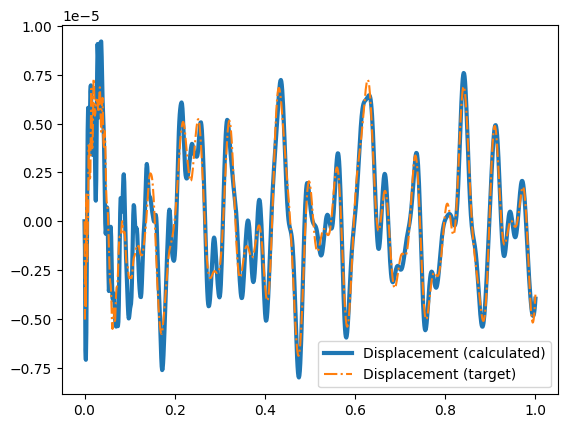

In [3]:
# Define error in tqdm 
#
import matplotlib.pyplot as plt 
#
transient_piezo_truss.solve(T, UNodes_free, u_free, V=Vol)
plt.plot(T, transient_piezo_truss.calDisp[6, 0, :], label="Displacement (calculated)", linewidth=3)
transient_piezo_truss.solve(T, UNodes_clamped, u_clamped, V=Vol)
plt.plot(T, transient_piezo_truss.calDisp[6, 0, :], label="Displacement (target)", linestyle="-.")
plt.legend()
plt.show()

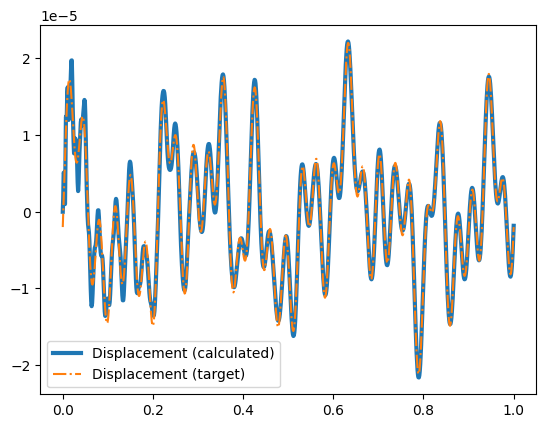

In [4]:
# Define error in tqdm 
#
import matplotlib.pyplot as plt 
#
transient_piezo_truss.solve(T, UNodes_free, u_free, V=Vol)
plt.plot(T, transient_piezo_truss.calDisp[10, 0, :], label="Displacement (calculated)", linewidth=3)
transient_piezo_truss.solve(T, UNodes_clamped, u_clamped, V=Vol)
plt.plot(T, transient_piezo_truss.calDisp[10, 0, :], label="Displacement (target)", linestyle="-.")
plt.legend()
plt.show()

In [5]:
print(Vol)

[[[  6.9179004    5.95092844]
  [ 13.89412933  -1.83920061]
  [ -5.45455503 -13.57417776]
  [ -6.53793022   3.67364838]
  [  0.909468   -26.19479191]
  [  9.79861764  -6.90643521]]

 [[  9.33781134   0.60430197]
  [ 11.53682986  -2.9550128 ]
  [ 12.81606354  -0.39352434]
  [  8.81248336   3.33014589]
  [ 10.12099191   5.58063764]
  [ 11.81671058  -2.04623534]]

 [[ 10.63057644  -0.47122181]
  [  8.53736466   2.89271179]
  [  7.10410989   0.39236956]
  [ 11.16549449  -3.19765137]
  [  9.7932578   -5.44541652]
  [  8.29200127   1.73765414]]

 [[  8.84049661  -0.54376221]
  [  7.54192638   1.22203583]
  [ 10.77447745   0.72990738]
  [ 11.17589827   0.33263835]
  [  7.67445817   2.99599394]
  [  9.03714924   0.98857836]]

 [[ 11.07563963   0.96625766]
  [ 12.51372758  -1.15606732]
  [  8.99335417  -0.42622493]
  [  8.77717709   0.09093566]
  [ 11.97572258  -2.55396568]
  [ 10.47661353  -0.62195052]]

 [[  3.82627188   0.89132495]
  [  7.09856828  -2.20585104]
  [ 10.11382988   1.94285783]
